# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [2]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('/data/condemn.txt')
condemnations.shape

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,8,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(32586, 40)

In [12]:
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'])
daterange1 = '01-01-1986'
daterange2 = '12-31-2014'
mask = (condemnations['InspectDate'] >= daterange1) & (condemnations['InspectDate'] <= daterange2)
condemnations = condemnations.loc[mask]
condemnations.InspectDate = condemnations.InspectDate.dt.strftime('%Y')

In [13]:
condemnations

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,NaN,NaN,NaN,NaN,NaN,NaN,1.330900e+10,330900220.0,2013,NaN,...,NaN,NaN,NaN,NaN,NaN,"Ulrich, Ross",NaN,NaN,NaN,NaN
32576,NaN,NaN,NaN,NaN,NaN,NaN,1.247600e+10,247600260.0,2029,NaN,...,NaN,NaN,NaN,NaN,NaN,"Ulrich, Ross",NaN,NaN,NaN,NaN
32581,NaN,NaN,NaN,NaN,NaN,NaN,1.382900e+10,382900560.0,5971,NaN,...,NaN,NaN,NaN,NaN,NaN,"Popoolas, Adebanjo",https://www.stlcitypermits.com/violationimages...,NaN,NaN,NaN
32582,NaN,NaN,NaN,NaN,NaN,NaN,1.303400e+10,303400010.0,7154,NaN,...,NaN,NaN,NaN,NaN,NaN,"Wood, Paul",NaN,NaN,NaN,NaN


In [14]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [27]:
import numpy as np
by_year = pd.pivot_table(data = condemnations,
                         index = 'InspectDate',
                         columns = 'Status',
                         aggfunc = {'Status': np.ma.count},
                         fill_value=0)

In [28]:
by_year

Status              
Status           B    L   R    W
InspectDate                     
1986            22   12  19  112
1987            91   20   8  361
1988           215   16  15  297
1989           277   15  11  432
1990           119   29   8  322
1991           139   18   4  351
1992           204   30   4  258
1993           185   47   2  193
1994           208   94   5  293
1995           176  127   0  268
1996           214  171   0  794
1997           281  328   0  878
1998           254  343   0  599
1999           272  283   0  826
2000           320  268   0  529
2001           381  262   0  296
2002           383  227   0  317
2003           361  201   0  282
2004           354  204   0  381
2005           410  237   0  345
2006           479  233  20  370
2007           613  262   0  341
2008           700  254   0  334
2009           785  223   0  200
2010          1161  193   0  154
2011          1028  275   0  107
2012           738  257   1   28
2013           185  209   1    2
2014            17  128   0    0

In [17]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

AssertionError: 

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


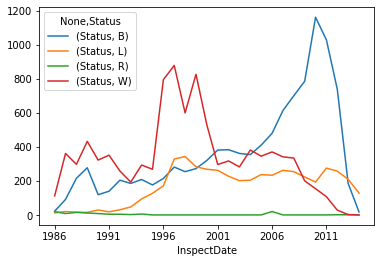

In [29]:
%matplotlib inline
by_year.plot()

---

In [30]:
# From plotting the creating pivot table, we can see the trendlines indicate differing pattern for each condemnation status 
# over the 28 year period. Status 'B' shows a steady increase after around 1989 until mid 2006 where it the count increases 
# drastically over a 5 year span until the count suddenly falls rapidly towards the end of this period. Status 'W' has more of 
# a deviated line, showing stagnation until its count rises around 1996 to a peak and dropping down below a count of 400 after 
# the turn of the century. Status 'R' and 'L' show lower counts in this period, but status 'R' counts remained consistently
# little to none during this span.

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [31]:
import pandas as pd
meetings = pd.read_csv('/data/meetings.csv')
meetings['startdate'] = meetings['startTime'].str[0:10]
date1 = '2020-02-17'
date2 = '2020-02-28'
date3 = '2020-03-16'
date4 = '2020-03-27'
feb = meetings.loc[(meetings['startdate'] >= date1) & (meetings['startdate'] <= date2)]
before = feb['meetingDurationMinutes']
mar = meetings.loc[(meetings['startdate'] >= date3) & (meetings['startdate'] <= date4)]
during = mar['meetingDurationMinutes']

In [ ]:
summary = ...

---

In [ ]:
assert(len(summary) == 22)

In [ ]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
